In [1]:
import pymc3 as pm
import numpy as np
import scipy.io as sio

import matplotlib.pyplot as plt
%matplotlib inline

import imageio

In [2]:
mycmap = 'seismic'

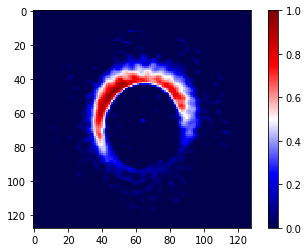

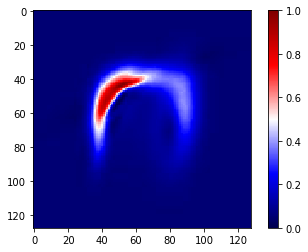

In [79]:
I = imageio.imread('name_HD142527.jpg')
Imod = imageio.imread('name_HD142527_reconstruction_1500basis.jpg')

plt.figure()
im = plt.imshow(I/np.max(I), cmap=mycmap)
plt.colorbar(im)
plt.figure()
im = plt.imshow(Imod/np.max(Imod), cmap=mycmap)
plt.colorbar(im)

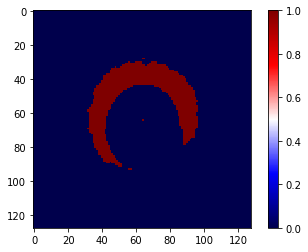

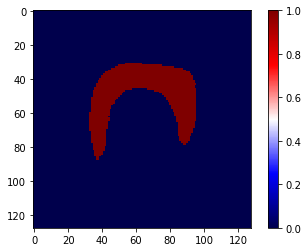

In [80]:
plt.figure()
im = plt.imshow(I/np.max(I) > 0.2, cmap=mycmap)
plt.colorbar(im)
plt.figure()
im = plt.imshow(Imod/np.max(Imod) > 0.2, cmap=mycmap)
plt.colorbar(im)

# Wasserstein Distance

In [74]:
def cumulative(A):
    cumMatrix = np.zeros(A.shape)
    cumMatrix[0,:] = np.cumsum(A[0,:])
    cumMatrix[:,0] = np.cumsum(A[:,0])
    
    horizontalSum = np.cumsum(A, axis=1)
    verticalSum = np.cumsum(A, axis=0)
    
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if i == 0 or j == 0:
                continue
            cumMatrix[i,j] = cumMatrix[i-1,j-1] + verticalSum[i-1,j-1] + horizontalSum[i-1,j-1] + A[i,j]

    return cumMatrix

def wassersteing_distance(I,Imod):
    
    ny_I, nx_I       = I.shape
    ny_Imod, nx_Imod = Imod.shape
    
#     assert ny_I == ny_Imod and nx_I == nx_Imod, 'Differents '
    distance = 0
    F = cumulative(I)
    F = 1.0*F/F[-1,-1]
    
    G = cumulative(Imod)
    G = 1.0*G/G[-1,-1]
    for x in range(nx_I):
        for y in range(ny_I):
            for xmod in range(nx_Imod):
                for ymod in range(ny_Imod):
                    distance += ((x-xmod)**2.0 + (y-ymod)**2.0)*np.min([F[y,x], G[ymod,xmod]])
                    
    return distance

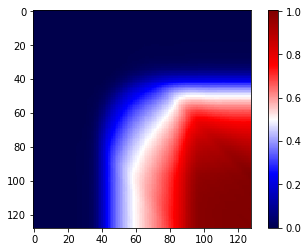

In [75]:
# wassersteing_distance(I,Imod)
I_cum = cumulative(I)
I_cum = I_cum/I_cum[-1,-1]
im = plt.imshow(I_cum, cmap=mycmap)
plt.colorbar(im)

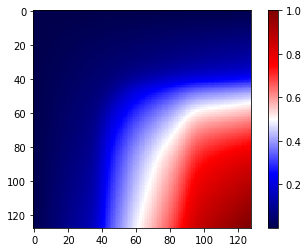

In [76]:
I_cum = cumulative(Imod)
I_cum = I_cum/I_cum[-1,-1]
im = plt.imshow(I_cum, cmap=mycmap)
plt.colorbar(im)

In [77]:
wassersteing_distance(I,Imod)

77686098765.306381

In [81]:
from hausdorff import hausdorff, weighted_hausdorff


In [91]:
# print("Hausdorff distance test: {0}".format())
# print("Weighted Hausdorff distance test: {0}".format(weighted_hausdorff(X, Y, w)))

hausdorff(I.astype(float)/np.max(I) ,Imod.astype(float)/np.max(Imod))

1.6741975187520333